In [1]:
# Exercise 1
import pandas
import keras
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras import optimizers, regularizers
import matplotlib.pyplot as plt

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


/users/lprone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_dataset():
    dataset = load_files('dataset/txt_sentoken', shuffle=False)
    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=42)
    print('\nTraining samples {}, test_samples {}:'.format(len(X_train), len(X_test)))


    
    vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english', max_df=0.7, norm='l2', vocabulary=None)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train, X_test, y_train, y_test

In [3]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = load_dataset()


train_examples = X_train.shape[0]
input_size = X_train.shape[1]
test_examples = X_test.shape[0]


batch_size = 50
num_classes = 1
epochs = 10


print(train_examples)
print(test_examples)
print(input_size)


Training samples 1500, test_samples 500:
1500
500
416701


In [11]:
X_train = X_train.reshape(train_examples, input_size)
X_test = X_test.reshape(test_examples, input_size)


model = Sequential([
    Dense(1000, input_shape=(input_size,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.01))
])

print(model.summary())



model.compile(loss='binary_crossentropy',
      optimizer='adam', 
      metrics=['accuracy']) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              416702000 
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 416,712,021
Trainable params: 416,712,021
Non-trainable params: 0
_________________________________________________________________
None


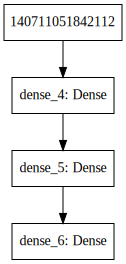

In [12]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [13]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1, );

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 140s 93ms/step - loss: 5.5945 - acc: 0.5593 - val_loss: 3.5059 - val_acc: 0.5760
Epoch 2/10
1500/1500 [==============================] - 95s 63ms/step - loss: 2.9564 - acc: 0.6280 - val_loss: 2.7241 - val_acc: 0.5280
Epoch 3/10
1500/1500 [==============================] - 95s 63ms/step - loss: 2.5463 - acc: 0.6527 - val_loss: 2.5164 - val_acc: 0.5420
Epoch 4/10
1500/1500 [==============================] - 95s 63ms/step - loss: 2.3652 - acc: 0.6513 - val_loss: 2.3262 - val_acc: 0.6540
Epoch 5/10
1500/1500 [==============================] - 94s 63ms/step - loss: 2.2537 - acc: 0.6753 - val_loss: 2.3032 - val_acc: 0.5340
Epoch 6/10
1500/1500 [==============================] - 95s 64ms/step - loss: 2.1902 - acc: 0.6967 - val_loss: 2.1790 - val_acc: 0.6720
Epoch 7/10
1500/1500 [==============================] - 96s 64ms/step - loss: 2.1693 - acc: 0.7040 - val_loss: 2.1293 - val_acc: 0.6900


In [14]:
scores = model.evaluate(X_test, y_test)

500/500 [==============================] - 7s 13ms/step


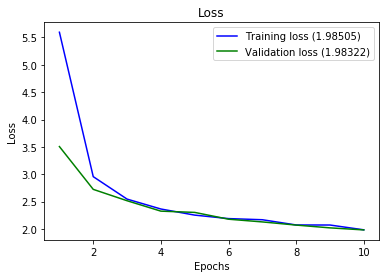

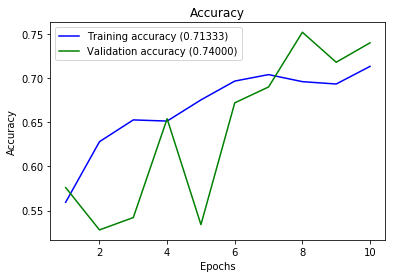



Loss: 1.9832207469940186
Accuracy: 0.7400000004768371


In [15]:
plot_history(hist) 
print('\n')
print('Loss:', scores[0])
print('Accuracy:', scores[1])


predictions = model.predict(X_test)
prediction_int = [round(x[0]) for x in predictions]

results = pandas.DataFrame(y_test, columns=['true_value'])
results.loc[:, 'prediction'] = predictions
results.loc[:, 'prediction_int'] = prediction_int
results.to_csv("predictions.csv",index=False)